**Problem Statement**

Context: In the domain of sports analytics, quantifying the duration a brand's logo appears
on screen during a broadcast is essential for dynamic advertising pricing. Manual tagging of
video footage is time-consuming and prone to human error.


**Objective**

The objective of Phase 1 is to establish a Proof of Concept (PoC) by building a
Deep Learning Computer Vision model capable of automatically identifying and classifying
three specific brand logos (Yonex, 12Bet, and HSBC) from static images.


**Goal**

Develop a Convolutional Neural Network (CNN) to achieve a baseline classification
accuracy of >80% on unseen test data, distinguishing between the three target brands. This
model will serve as the core engine for the subsequent video analysis phase


**CNN code for Bi - class classfication**

In [1]:
# part 1 = Importing the libraries required for coding
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.layers import Flatten
from keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

**Initializing the CNN layers**

In [2]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64,(3,3),input_shape = (128,128,3),activation ='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

#  Adding one more layer of conv and pooling --- Conv+pool
classifier.add(Conv2D(32,(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size =(3,3)))


# Step 3- Flatenning
classifier.add(Flatten())

# Step 4 - Full connection to neural network
classifier.add(Dense(units= 128, activation = 'relu')) # Neurons in first HL
classifier.add(Dense(units= 16, activation = 'relu'))
classifier.add(Dense(units= 8, activation = 'relu'))
classifier.add(Dense(units= 3, activation = 'softmax')) #
classifier.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,661,011 (6.34 MB)

 Trainable params: 1,661,011 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

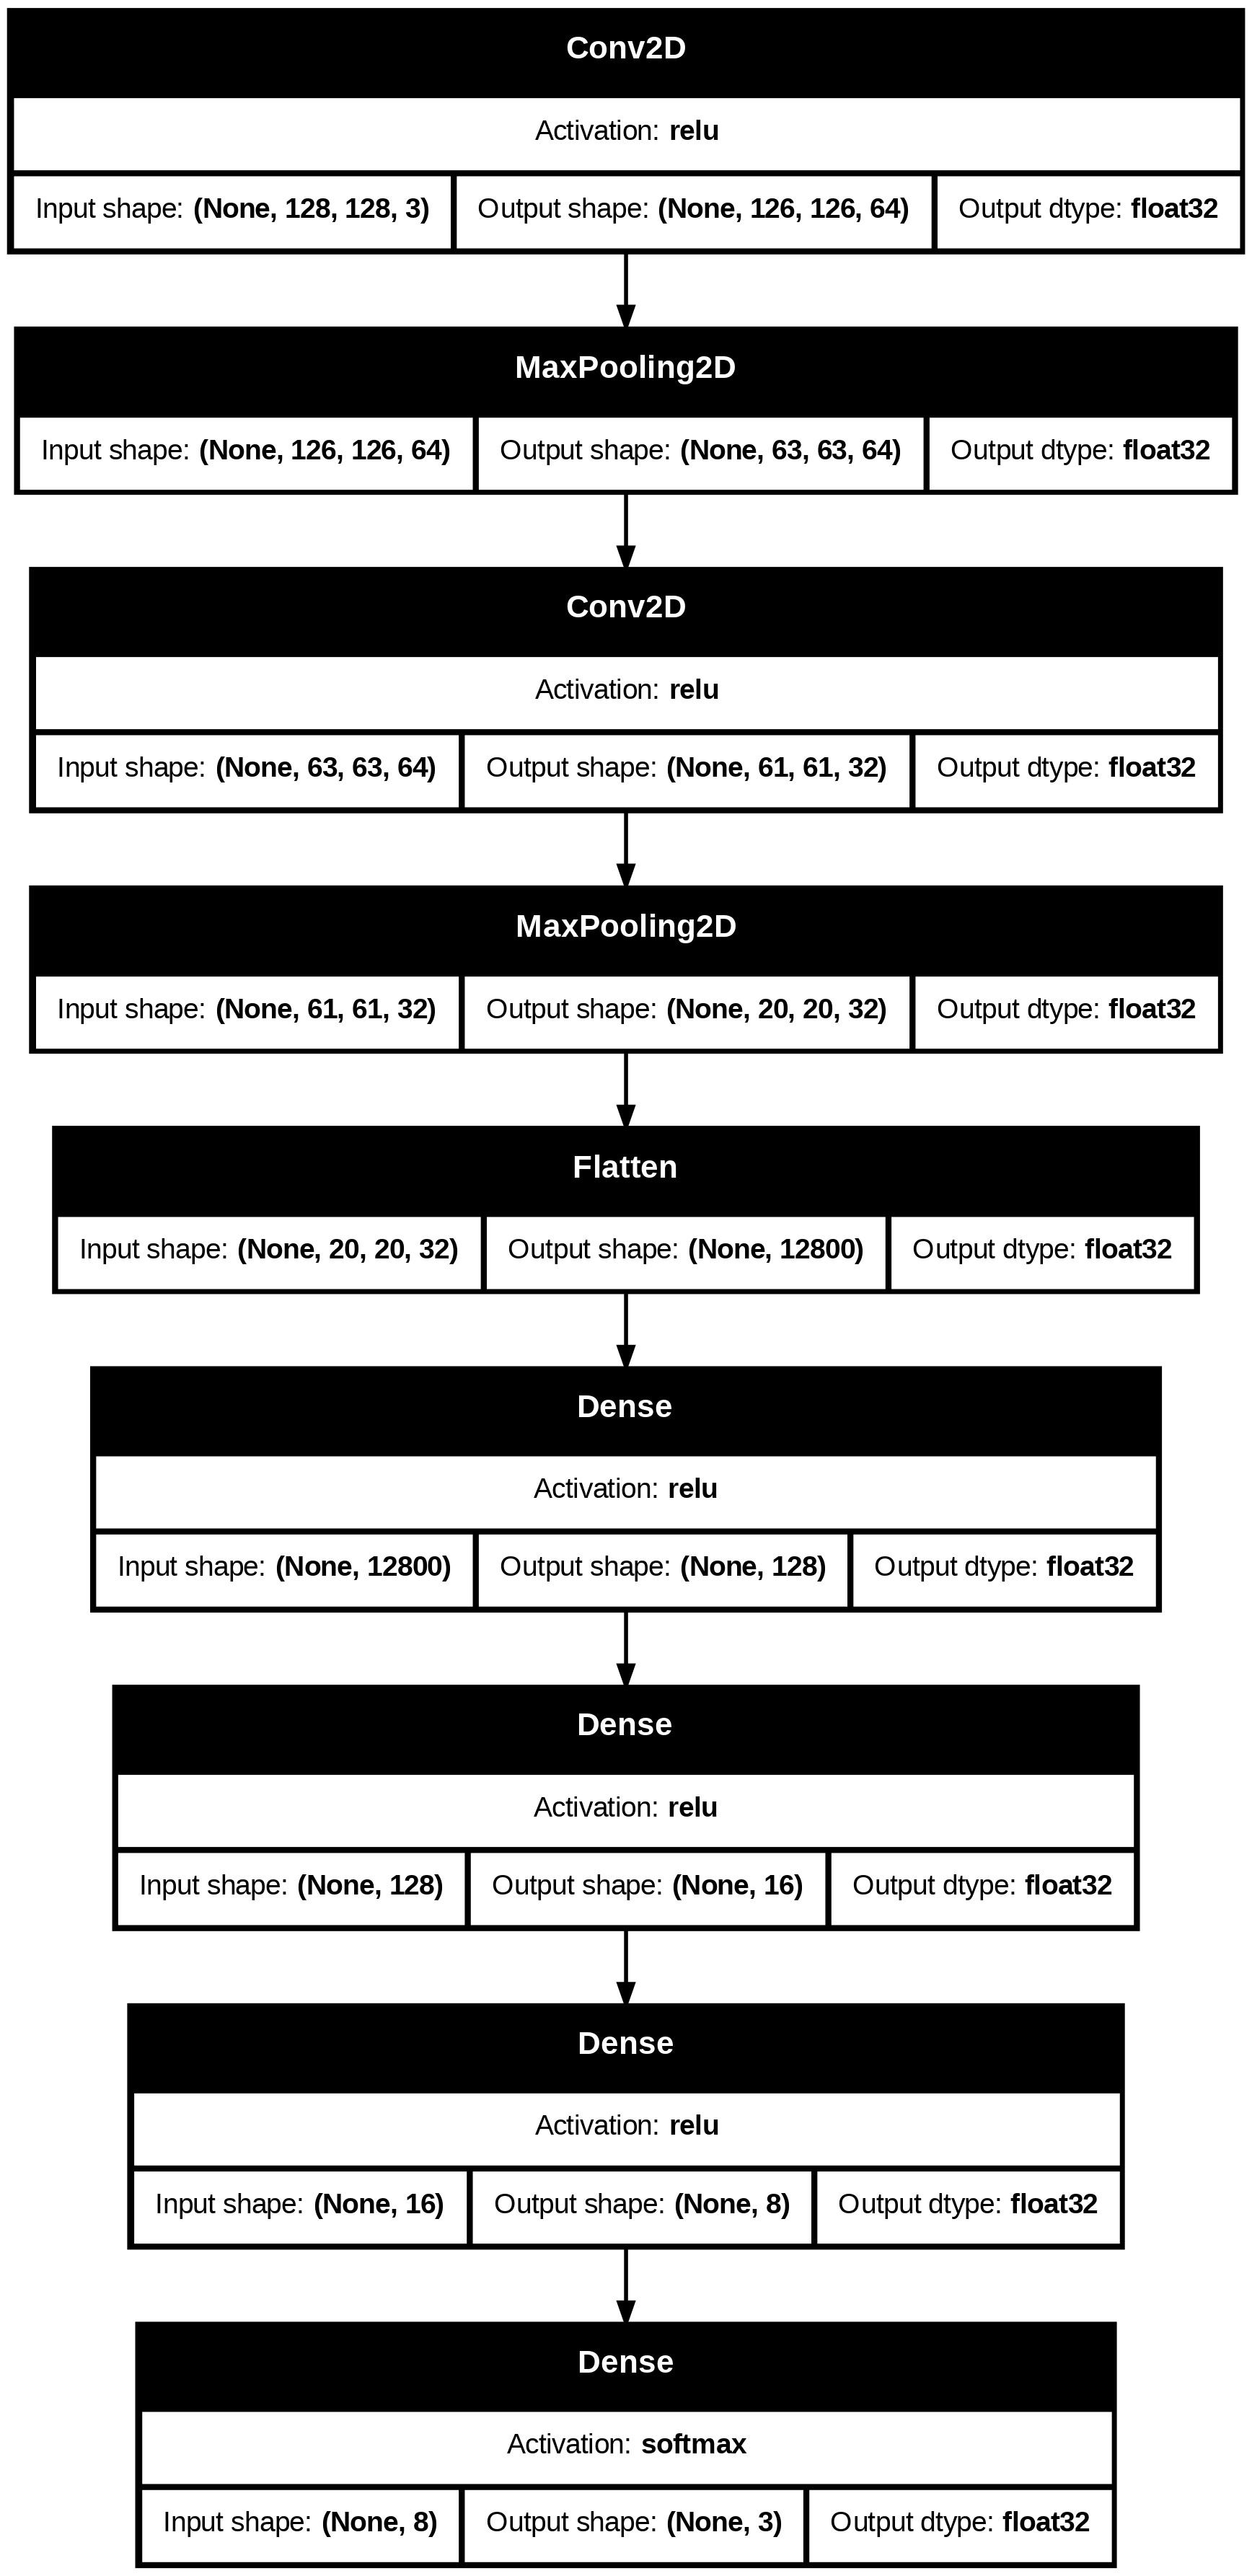

In [3]:
from tensorflow import keras
from keras import layers
keras.utils.plot_model(
    classifier,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [4]:
# Import your dataset here

# a small code to unzip the dataset folder
from zipfile import ZipFile
file_name = '/content/Project.zip'
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('zip data extracted')

zip data extracted


**Compiling with various paramters**

In [5]:
classifier.compile(optimizer = 'adam',
                   loss='categorical_crossentropy',
                   metrics=['Accuracy'])

**Data Training (Fitting)**

involves Data Augumentation, .... and then fitting

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

my_segregation = ['12Bet','HSBC','Yonex']

training_set = train_datagen.flow_from_directory("Project/Training_Set",
                                                 target_size = (128, 128),
                                                 classes= my_segregation,
                                                 batch_size = 15,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("Project/Test_Set",
                                            target_size = (128, 128),
                                            classes= my_segregation,
                                            batch_size = 5,
                                            class_mode = 'categorical',shuffle = False)

history = classifier.fit(training_set,
                         #steps_per_epoch = 6, # generally the formula for this is number of samples in the dataset / batch size
                         epochs = 10,
                         validation_data = test_set,
                         verbose=1,
                         #validation_steps = 10)
                        )

Found 441 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - Accuracy: 0.3478 - loss: 1.1304 - val_Accuracy: 0.5917 - val_loss: 0.9657
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - Accuracy: 0.5764 - loss: 0.9473 - val_Accuracy: 0.6833 - val_loss: 0.7530
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - Accuracy: 0.6708 - loss: 0.8188 - val_Accuracy: 0.6750 - val_loss: 0.7166
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - Accuracy: 0.7581 - loss: 0.6713 - val_Accuracy: 0.8333 - val_loss: 0.5273
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - Accuracy: 0.7987 - loss: 0.5353 - val_Accuracy: 0.8500 - val_loss: 0.4612
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - Accuracy: 0.8846 - loss: 0.4055 - val_Accuracy: 0.7750 - val_loss: 0.4608
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - Accuracy: 0.8826 - loss: 0.3835 - val_Accuracy: 0.8833 - val_loss: 0.4061
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - Accuracy: 0.9125 - loss: 0.2886 - val_Accuracy: 0.9250 - val_

**Model Evaluation**

Let’s visualize the training and validation accuracy with each epoch.

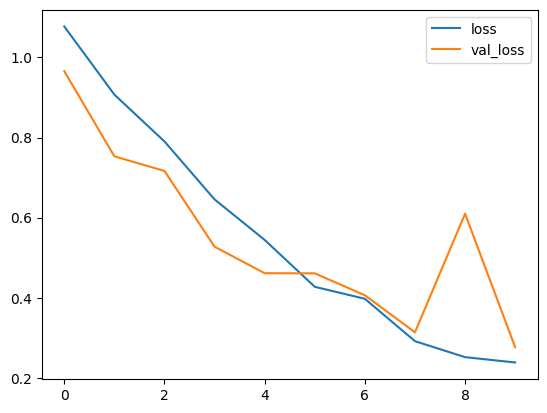

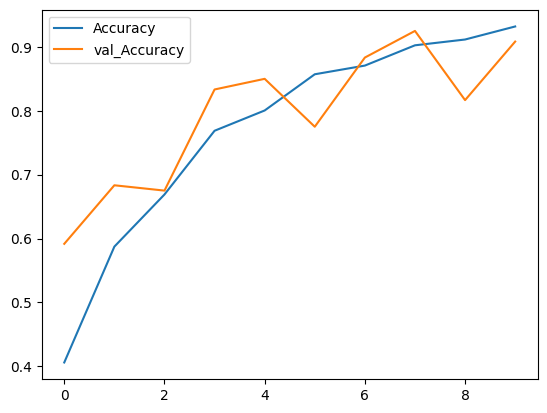

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['Accuracy', 'val_Accuracy']].plot()
plt.show()

**Making prediction for a single image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Probabilities: [[0. 1. 0.]]
Predicted Class Index: 1
Prediction: This is HSBC


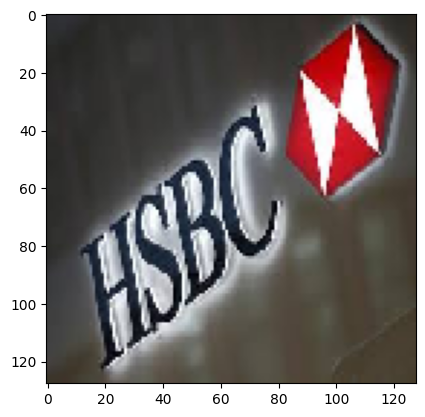

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/single_image.jpg', target_size = (128, 128))

plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

 # testing/prediction for a specific image
result_array = classifier.predict(test_image)
print("Probabilities:", result_array)

# --- Prediction Interpretation ---
# np.argmax gets the index of the highest probability
result = np.argmax(result_array, axis=1)[0]
print("Predicted Class Index:", result)

# Mapping index to class name based on the 'my_classes' list defined earlier
prediction = my_segregation[result]
print(f'Prediction: This is {prediction}')


**Evaluation of model**

In [10]:
### Evaluate for train generator
loss,acc = classifier.evaluate(training_set,batch_size = 32, verbose = 1)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluate for validation generator
loss,acc = classifier.evaluate(test_set,batch_size = 32, verbose = 1)

print('The accuracy of the model for test data is:',acc*100)
print('The Loss of the model for test data is:',loss)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - Accuracy: 0.9051 - loss: 0.2423
The accuracy of the model for training data is: 91.15646481513977
The Loss of the model for training data is: 0.2384003847837448
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Accuracy: 0.9786 - loss: 0.1101
The accuracy of the model for test data is: 90.83333611488342
The Loss of the model for test data is: 0.2762771546840668


**Prediction over test data**

and obtaining confusion matrix

TP,TN,FP,FN and then business value of the whole transaction...

 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


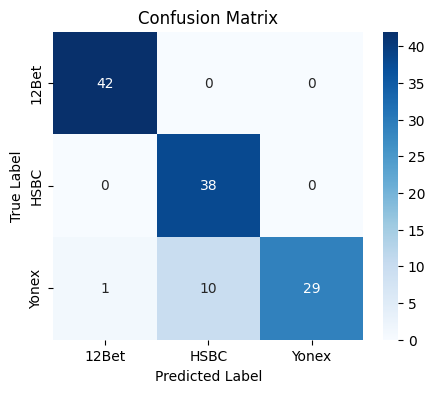

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = ['12Bet', 'HSBC', 'Yonex']

# Get true labels from the test set
y_true = test_set.classes

# Get predictions from the model
# Ensure the test_set is reset to get predictions in the correct order
test_set.reset()
y_pred = classifier.predict(test_set)

# Convert y_pred from one-hot encoded probabilities to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_mtx, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels,
            cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(classification_report(y_true, y_pred_labels, target_names=labels))

              precision    recall  f1-score   support

       12Bet       0.98      1.00      0.99        42
        HSBC       0.79      1.00      0.88        38
       Yonex       1.00      0.72      0.84        40

    accuracy                           0.91       120
   macro avg       0.92      0.91      0.90       120
weighted avg       0.93      0.91      0.91       120

